<a href="https://colab.research.google.com/github/Genevera-ET0716/Genevra/blob/main/cs475_675_hw4_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4 Python Programming

Last updated: Oct 31, 2025

## Learning Objectives
In this assignment, you will implement the K-means algorithm.  

Please answer all questions in this notebook (you will see comments like "# YOUR CODE HERE" and "# END YOUR CODE").


## Setup

**IMPORTANT**: Before you edit this notebook, you will need to make your own copy (otherwise your edits **will not be saved**).  You can do so by clicking the "File" dropdown in the upper left, and then selecting "Save a copy in Drive" as shown in the screenshot below.

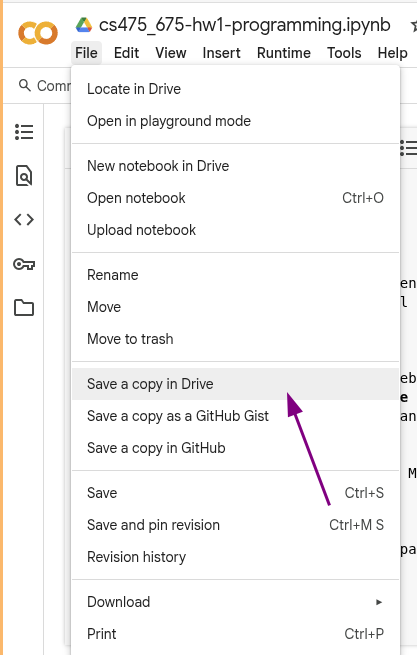

In [ ]:
# Install required packages
%pip install -q numpy pandas matplotlib scikit-learn datasets tqdm ipywidgets seaborn

In [ ]:
# Setup and imports
from typing import List, Optional, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.typing import NDArray
from sklearn.datasets import (make_moons, make_blobs)
from sklearn.metrics import silhouette_score
from scipy.stats import multivariate_normal


## K-means Clustering

In this section, you will implement the K-means clustering algorithm from scratch. K-means is an unsupervised learning algorithm that partitions data into k clusters by minimizing the within-cluster sum of squares. You will implement the core components including initialization, assignment, and update steps, then visualize the clustering process on various datasets.


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Create well-separated blobs dataset for initial demonstration
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, n_features=2,
                              random_state=42, cluster_std=0.8)

print(f"Dataset shape: {X_blobs.shape}")
print(f"Number of true clusters: {len(np.unique(y_blobs))}")
print(f"First 5 samples: {X_blobs[:5]}")


### 1.1 Implement K-means Clustering *(autograded)*

Implement the core components of the K-means algorithm:
- `_init_centers_random`: Initialize cluster centers randomly
- `_assign_labels`: Assign each point to the nearest center
- `_update_centers`: Update centers as cluster means

In [ ]:
# IMPORTANT: This cell contains metadata for grading.
# Everything in this cell will be used by the autograder.
# Do not delete this cell.


class KMeans:
    """Minimal K-means implementation.

    K-means clustering algorithm that partitions data into k clusters
    by minimizing within-cluster sum of squares.
    """

    def __init__(self, n_clusters: int = 3, max_iter: int = 100,
                 random_state: Optional[int] = None) -> None:
        """Initialize KMeans clustering.

        Args:
            n_clusters: Number of clusters to form.
            max_iter: Maximum number of iterations for convergence.
            random_state: Random seed for reproducibility.
        """
        self.k = int(n_clusters)
        self.max_iter = int(max_iter)
        self.random_state = random_state
        self.centers_: Optional[NDArray] = None
        self.labels_: Optional[NDArray] = None

    def fit(self, X: NDArray[np.float64]) -> "KMeans":
        """Run Lloyd's algorithm until labels stabilize or max_iter is reached.

        Args:
            X: Input data of shape (n_samples, n_features).

        Returns:
            Self instance for method chaining.
        """
        X = np.asarray(X, dtype=float)
        if X.ndim != 2:
            raise ValueError("X must be a 2D array")
        rng = np.random.default_rng(self.random_state)
        centers = self._init_centers_random(X, rng)
        labels = None
        for _ in range(self.max_iter):
            new_labels = self._assign_labels(X, centers)
            if self._labels_converged(labels, new_labels):
                labels = new_labels
                break
            labels = new_labels
            centers = self._update_centers(X, labels, rng)
        self.centers_, self.labels_ = centers, labels
        return self

    def predict(self, X: NDArray[np.float64]) -> NDArray[np.int32]:
        """Assign each sample in X to the nearest learned center.

        Args:
            X: Input data of shape (n_samples, n_features).

        Returns:
            Cluster labels for each sample.
        """
        if self.centers_ is None:
            raise RuntimeError("Must call fit before predict")
        X = np.asarray(X, dtype=float)
        return self._assign_labels(X, self.centers_)

    def fit_transform(self, X: NDArray[np.float64]) -> NDArray[np.float64]:
        """Fit and return distances-to-centers matrix (n x k).

        Args:
            X: Input data of shape (n_samples, n_features).

        Returns:
            Distance matrix of shape (n_samples, n_clusters).
        """
        self.fit(X)
        X = np.asarray(X, dtype=float)
        # n x k matrix of Euclidean distances
        return np.sqrt(((X[:, None, :] - self.centers_[None, :, :]) ** 2).sum(axis=2))

    # --- helpers ---
    def _init_centers_random(self, X: NDArray[np.float64],
                            rng: np.random.Generator) -> NDArray[np.float64]:
        """Pick k distinct rows from X uniformly at random using rng.

        Args:
            X: Input data of shape (n_samples, n_features).
            rng: Random number generator instance.

        Returns:
            Initial centers of shape (k, n_features).
        """
        n = X.shape[0]
        if self.k > n:
            raise ValueError("n_clusters must be <= number of samples")
        # YOUR CODE HERE
        # choose distinct indices uniformly without replacement
        # use rng.choice to sample without replacement
        idx = ...
        # END YOUR CODE
        return X[idx].copy()


    def _assign_labels(self, X: NDArray[np.float64], centers: NDArray[np.float64]) -> NDArray[np.int32]:
        """Return argmin squared Euclidean distance labels for each row in X.

        Args:
            X: Input data of shape (n_samples, n_features).
            centers: Cluster centers of shape (k, n_features).

        Returns:
            Cluster labels for each sample.
        """
        # YOUR CODE HERE
        # distances: (n, k)
        d2 = ...
        return ...
        # END YOUR CODE

    def _update_centers(self, X: NDArray[np.float64], labels: NDArray,
                       rng: np.random.Generator) -> NDArray[np.float64]:
        """Return new centers as per-cluster means.

        If a cluster has no points, reseed that center by sampling
        a row from X uniformly at random (one-shot).

        Args:
            X: Input data of shape (n_samples, n_features).
            labels: Cluster labels for each sample.
            rng: Random number generator instance.

        Returns:
            Updated cluster centers of shape (k, n_features).
        """
        n, d = X.shape
        new_centers = np.zeros((self.k, d), dtype=float)
        # YOUR CODE HERE
        for j in range(self.k):
            # mask is a boolean array of points in cluster j
            mask = ...
            if np.any(mask):
                # if there are points in the cluster, update the center
                ...
            else:
                # if there are no points in the cluster, reseed from data uniformly at random using rng
                ...

        # END YOUR CODE
        return new_centers

    def _labels_converged(self, old_labels: Optional[NDArray],
                         new_labels: NDArray) -> bool:
        """Return True if labels have stabilized (including first-iter handling).

        Args:
            old_labels: Previous iteration's labels or None for first iteration.
            new_labels: Current iteration's labels.

        Returns:
            True if converged, False otherwise.
        """
        if old_labels is None:
            return False
        return np.array_equal(old_labels, new_labels)


### 1.2 Demonstrate K-means on Well-Separated Blobs

Let's fit K-means on the well-separated blobs dataset and visualize the results.


This shows the step-by-step evolution of cluster centers.


In [ ]:
def visualize_centroid_evolution(X: NDArray[np.float64], kmeans: KMeans,
                                  title: str = "K-means Centroids Evolution",
                                  max_iterations: int = 6) -> None:
    """Visualize the evolution of centroids across different iterations.

    Creates a series of subplots showing how centroids move at each step
    of the K-means algorithm.

    Args:
        X: Input data of shape (n_samples, 2).
        kmeans: Fitted KMeans instance.
        title: Title for the plot.
        max_iterations: Maximum number of iterations to visualize.
    """
    if X.shape[1] != 2:
        print(f"Warning: Can only visualize 2D data. Data has {X.shape[1]} dimensions.")
        return

    # Simulate the clustering process step by step
    rng = np.random.default_rng(kmeans.random_state)
    centers = kmeans._init_centers_random(X, rng)
    labels = None

    # Store centroid positions at each iteration
    centroid_history = [centers.copy()]
    labels_history = []

    for i in range(max_iterations):
        new_labels = kmeans._assign_labels(X, centers)
        labels_history.append(new_labels.copy())

        if kmeans._labels_converged(labels, new_labels):
            break
        labels = new_labels
        centers = kmeans._update_centers(X, labels, rng)
        centroid_history.append(centers.copy())

    # Add final state if not already included
    if len(centroid_history) == len(labels_history):
        centroid_history.append(kmeans.centers_.copy())
        labels_history.append(kmeans.labels_.copy())

    # Determine grid layout
    n_iterations = len(centroid_history)
    n_cols = min(3, n_iterations)
    n_rows = (n_iterations + n_cols - 1) // n_cols

    # Create figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    fig.suptitle(title, fontsize=16, y=1.02)

    # Handle single subplot case
    # Convert axes to list for consistent indexing
    if not isinstance(axes, np.ndarray):
        axes = [axes]
    else:
        axes = axes.flatten().tolist()
    # Define colors for each centroid
    centroid_colors = plt.cm.tab10(np.linspace(0, 1, kmeans.k))

    for idx in range(n_iterations):
        ax = axes[idx]
        centers = centroid_history[idx]

        # Plot data points with their assigned labels
        if idx < len(labels_history):
            labels = labels_history[idx]
            ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis',
                      alpha=0.3, s=30, edgecolors='black', linewidth=0.3)
        else:
            ax.scatter(X[:, 0], X[:, 1], alpha=0.3, s=30,
                      edgecolors='black', linewidth=0.3, c='gray')

        # Plot centroids with distinct colors and connecting lines
        for j in range(kmeans.k):
            color = centroid_colors[j]
            # Plot centroid
            ax.scatter(centers[j, 0], centers[j, 1], c=[color],
                      marker='X', s=300, edgecolors='black', linewidth=2,
                      zorder=5, label=f'Centroid {j+1}' if idx == 0 else '')

            # Draw line from previous iteration (if exists)
            if idx > 0:
                prev_centers = centroid_history[idx - 1]
                ax.plot([prev_centers[j, 0], centers[j, 0]],
                       [prev_centers[j, 1], centers[j, 1]],
                       color=color, linestyle='--', linewidth=2,
                       alpha=0.6, zorder=4)

        if idx == 0:
            iter_title = "Initial"
        elif idx < n_iterations - 1:
            iter_title = f"Iteration {idx}"
        else:
            iter_title = "Final"
        ax.set_title(iter_title, fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)
        if idx == 0:
            ax.legend(loc='upper right', fontsize=8)

    # Hide unused subplots
    for idx in range(n_iterations, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
# Visualize centroid evolution step by step
# We'll use the plot as a sanity check for the algorithm implementation

kmeans_vis = KMeans(n_clusters=4, max_iter=10, random_state=42)
kmeans_vis.fit(X_blobs)

visualize_centroid_evolution(X_blobs, kmeans_vis,
                             "Centroid Evolution - Step by Step",
                             max_iterations=6)


### 1.3 Compare K-means on Different Datasets

Now let's see how K-means performs on different types of datasets. We'll create several datasets and compare the clustering results.


In [ ]:
# We'll use the plot as a sanity check for the algorithm implementation
# Create different datasets for comparison
datasets = []

# 1. Well-separated blobs (already created)
datasets.append((X_blobs, "Well-Separated Blobs", 4))

# 2. Overlapping clusters
X_overlap, y_overlap = make_blobs(n_samples=300, centers=3, n_features=2,
                                   random_state=42, cluster_std=1.5)
datasets.append((X_overlap, "Overlapping Clusters", 3))

# 3. Anisotropic blobs (stretched)
X_aniso = np.dot(X_blobs, [[0.6, -0.6], [-0.4, 0.8]])
datasets.append((X_aniso, "Anisotropic Blobs", 4))

# 4. Moons (non-convex clusters - K-means will struggle)
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)
datasets.append((X_moons, "Two Moons (Non-convex)", 2))

# Fit K-means on each dataset and visualize
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('K-means Clustering on Various Datasets', fontsize=16)

results = []

for idx, (X, title, n_clusters) in enumerate(datasets):
    # Fit K-means
    kmeans = KMeans(n_clusters=n_clusters, max_iter=100, random_state=42)
    kmeans.fit(X)

    # Calculate silhouette score
    silhouette = silhouette_score(X, kmeans.labels_)
    results.append({"dataset": title, "silhouette": silhouette})

    # Plot original data
    ax_orig = axes[0, idx]
    if idx == 0:
        ax_orig.scatter(X[:, 0], X[:, 1], c=y_blobs, cmap='viridis', alpha=0.6, s=30)
    elif idx == 1:
        ax_orig.scatter(X[:, 0], X[:, 1], c=y_overlap, cmap='viridis', alpha=0.6, s=30)
    elif idx == 3:
        ax_orig.scatter(X[:, 0], X[:, 1], c=y_moons, cmap='viridis', alpha=0.6, s=30)
    else:
        ax_orig.scatter(X[:, 0], X[:, 1], alpha=0.6, s=30, c='gray')
    ax_orig.set_title(f"{title}\n(Original)")
    ax_orig.grid(True, alpha=0.3)

    # Plot clustered data
    ax_cluster = axes[1, idx]
    ax_cluster.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6, s=30)
    ax_cluster.scatter(kmeans.centers_[:, 0], kmeans.centers_[:, 1],
                      c='red', marker='X', s=150, edgecolors='black', linewidth=2)
    ax_cluster.set_title(f"K-means (k={n_clusters})\nSilhouette: {silhouette:.3f}")
    ax_cluster.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display results summary
results_df = pd.DataFrame(results)
print("\nClustering Results Summary:")
print(results_df.to_string(index=False))


## Submission

**IMPORTANT SUBMISSION INSTRUCTIONS:**
1. Make sure all cells are executed (Run All): This makes sure that your notebook does not produce errors. We will use the results produced by Gradescope autograder for grading.
2. Download this notebook: File -> Download -> Download .ipynb
3. Submit the .ipynb file to Gradescope
4. Do NOT rename the file when downloading
5. If your browser adds numbers like (1) or (2) to the filename, that's OK - the autograder will handle it